In [9]:
import numpy as np
from numpy.linalg import norm
import math, itertools
import matplotlib.pyplot as plt 

def read_data(filename, norm):
    ''' filename: txt or rtf file
        norm: boolean, normalize data s.t. each column is in range 0 - 1
    '''
#     with open(filename) as f:
#         data = [[(x.rstrip('\\').rstrip('}')) for x in line.split()] for line in f]
    # map to integers
#     for i in range(len(data)):
#         data[i] = list(map(int,data[i]))
#     data = np.array(data)
#     print(np.amax(data, axis=0))
#     print(data.amax(axis=0))

    data = np.loadtxt(filename)
#     print(data)
    if norm:
        data_norm = data / data.max(axis=0)
        return data_norm
    else:
        return data

class DPmeans:

    def __init__(self, x):
        """description
            x: x1, ..., xn: input data (numpy.ndarray)
            k: number of clusters
            mu: array of mean for each cluster
            lam: lambda: cluster penalty parameter, a threshold
            l: clusters
            r: indicators. ndarray (row: ith instance; col: kth cluster)
            output clustering l1, ..., lk and the number of clusters k
            This algorithm (called “DP-means” here) is described in: B. Kulis and M.I. Jordan. Revisiting k-means: New AlgorithmsviaBayesian Nonparametrics.29thInternationalConferenceonMachineLearning(ICML),2012.
            (https://arxiv.org/abs/1111.0352)
        """
        self.x = x
    
    def predict(self, xi, mu):
        # find_nearest_mu
        k = np.array([norm(xi - mui) for mui in mu]).argmin()
        return k
    
    def calc_lambda(self):
        max_distance = 0
        for x1,x2 in itertools.permutations(self.x, 2):
            max_distance = max(max_distance, norm(x1-x2))
        return max_distance

    def avg_cluster_variance(self,mu,r):
        K = r.shape[1] # number of clusters
        sum_k = 0
        for k in range(K):
            cluster_k = self.x[np.array(r, dtype=bool)[:,k],:]
            for xik in cluster_k:
                sum_k += norm(xik-mu[k])**2   
        return sum_k/K
    
    def train(self, mu, lam):
        iteration = 0
        converge = False    
        while not converge: # while not converge
#             print('mu_prev',mu_prev)
#             print('mu',mu)
            iteration += 1
            print('iteration: ', iteration)
            r = np.ones((len(self.x),len(mu))) # indicators
            mu_prev = mu
            
            # E-step: determine cluster assignments for all the data points
            for i in range(len(self.x)):  
                # find the closest clustering for xi
                k = self.predict(self.x[i],mu)
                if norm(mu[k]-self.x[i]) > lam:
                    print('create a new cluster')
                    # create a new cluster
                    mu = np.append(mu,self.x[i][np.newaxis],axis=0)
                    r_new = np.zeros((len(self.x),1))
                    r_new[i] = 1
                    r[i,:] = 0
                    r = np.append(r,r_new,axis=1)           
                else:
                    r[i,:] = 0
                    r[i,k] = 1

            # M-step: update the mean vector mu using the new cluster assignments
            for ki in range(r.shape[1]):
                if not r[:,ki].any(): # if cluster ki is empty
                    mu[ki] = np.zeros(mu[0].shape)
                else:
                    # average the points in the kth cluster
                    mu[ki] = np.mean(self.x[np.array(r, dtype=bool)[:,ki],:], axis = 0)
        
            if len(mu_prev) != len(mu):
                converge = False
            elif (mu_prev != mu).any():
                converge = False
            else:
                converge = True
            
        var = self.avg_cluster_variance(mu,r)
        print('number of clusters:', len(mu)-1)
        return mu, r, var
    
    
    

In [10]:
# numerical data
file_32 = '32_d.txt'
file_2 = '2_d.txt'
data = read_data(file_32, norm=True)
DPM = DPmeans(data)
mu0 = np.mean(data, axis = 0)
mu0 = mu0[np.newaxis]
max_lam = DPM.calc_lambda()

lam_values = np.linspace(0.1, 1.8, num=18)
# lam_values = [0.6]
variance = []
n_cluster = []
for lam in lam_values:
    mu, _, var = DPM.train(mu=mu0, lam=lam)
    variance.append(var)
    n_cluster.append(len(mu))
 

iteration:  1
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster

number of clusters: 16
iteration:  1
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
iteration:  2
number of clusters: 16
iteration:  1
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
iteration:  2
number of clusters: 16
iteration:  1
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster


In [533]:
# water-treatment data
import pandas as pd
data = pd.read_csv('water_treatment.csv',header=None)
del data[0]

data = data.values
data[data=='?'] = 0
data = data.astype(float)
# normalize
data = data / np.nanmax(data, axis=0)

DPM = DPmeans(data)
mu0 = np.mean(data, axis = 0)
mu0 = mu0[np.newaxis]

lam_values = np.linspace(0.1, 3, num=30)
variance = []
n_cluster = []
for lam in lam_values:
    mu, _, var = DPM.train(mu=mu0, lam=lam)
    variance.append(var)
    n_cluster.append(len(mu))
    

iteration:  1
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster

create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new 

create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new 

create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new 

create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new 

create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
iteration:  2
create a new cluster
iteration:  3
number of clusters: 154
iteration:  1
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a n

number of clusters: 32
iteration:  1
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
iteration:  2
number of clusters: 26
iteration:  1
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a new cluster
create a 

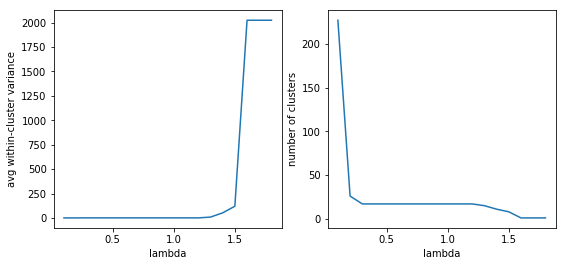

In [11]:
# plot
fig,axes=plt.subplots(ncols=2,figsize=(9,4))
axes[0].plot(lam_values, variance)
axes[1].plot(lam_values, n_cluster)
axes[0].set(xlabel="lambda",ylabel="avg within-cluster variance")
axes[1].set(xlabel="lambda",ylabel="number of clusters")
plt.show()


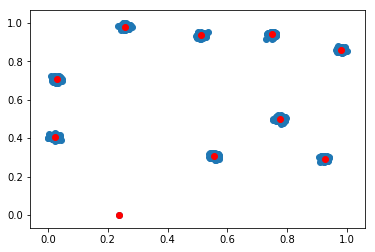

In [389]:
plt.scatter(x2_norm[:,0],x2_norm[:,1])
plt.scatter(mu[1:,0],mu[1:,1],color='r')
plt.show()